In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [213]:
np.random.seed(3)
X = np.random.uniform(0, 3, 100)
y = 5 + 2*X + np.random.uniform(-2, 5, 100)
X_ = np.c_[np.ones((100,1)), X] #concatenar 1 a variables independientes
theta_opt = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
theta_opt = theta_opt.reshape(-1,1)
theta_opt

array([[6.25833469],
       [2.24897912]])

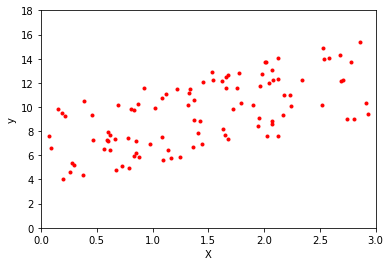

In [214]:
plt.plot(X,y, "r.")
plt.ylabel('y')
plt.xlabel('X')
plt.axis([0, 3, 0, 18])
plt.show()

In [215]:
X_nuevo = np.array([[0], [3]])
print(X_nuevo)
X_nuevo_ = np.c_[np.ones((2,1)), X_nuevo]
print(X_nuevo_)
y_pred = X_nuevo_.dot(theta_opt)
print('pred', y_pred)

[[0]
 [3]]
[[1. 0.]
 [1. 3.]]
pred [[ 6.25833469]
 [13.00527207]]


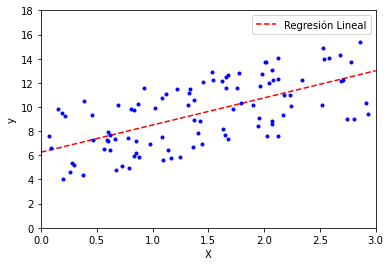

In [216]:
plt.plot(X_nuevo, y_pred, 'r--')
plt.plot(X,y, "b.")
plt.ylabel('y')
plt.xlabel('X')
plt.axis([0, 3, 0, 18])
plt.legend(["Regresión Lineal"])
plt.show()

In [217]:
mse = mean_squared_error(theta_opt, y_pred)
mse

57.84891892072414

In [309]:
data = pd.read_csv('ts.csv')

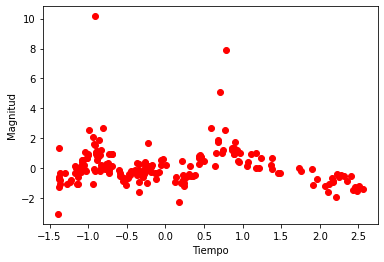

In [310]:
muestra = data.sample(200)
plt.scatter(muestra['tiempo'],muestra['magnitud'], color='red')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

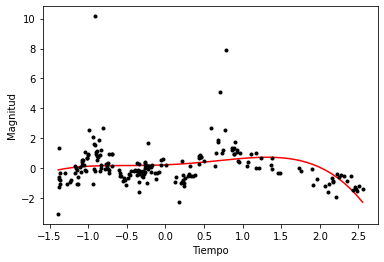

In [311]:
polinomio = PolynomialFeatures(degree = 4) 
model = LinearRegression() 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

model.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

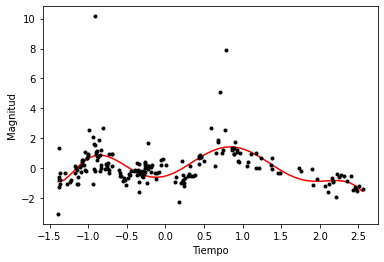

In [312]:
polinomio = PolynomialFeatures(degree = 8) 
model = LinearRegression() 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

model.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

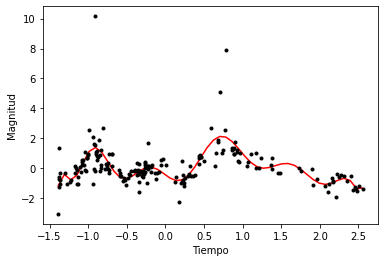

In [313]:
polinomio = PolynomialFeatures(degree = 16) 
model = LinearRegression() 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

model.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

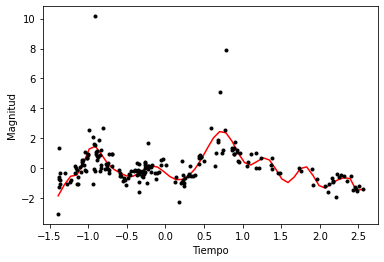

In [315]:
polinomio = PolynomialFeatures(degree = 24) 
model = LinearRegression() 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

model.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

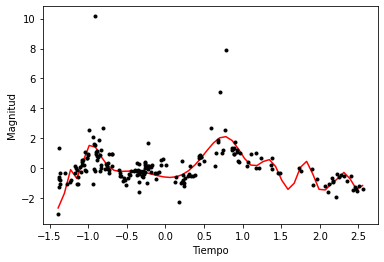

In [316]:
polinomio = PolynomialFeatures(degree = 36) 
model = LinearRegression() 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

model.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

In [317]:
# A medida que el grado del polinomio aumenta, el modelo tiende a sobreajustarse y "seguir" demasiado a los datos incluso outliers,
#esto provocaría que al realizar otra prueba con otros datos, el modelo no sería capaz de predicir de forma correcta. 
#Debe existir un equilibrio en el grado del polinomio y el ajuste de los datos.

# Regresión con penalización

D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


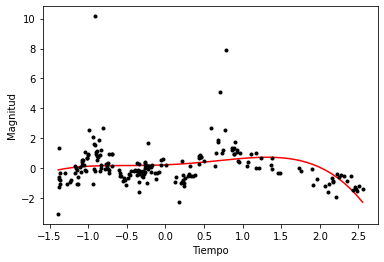

In [318]:
polinomio = PolynomialFeatures(degree = 4) 
modelo = Ridge(alpha=0.00000001,normalize=True) 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

modelo.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = modelo.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()



D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


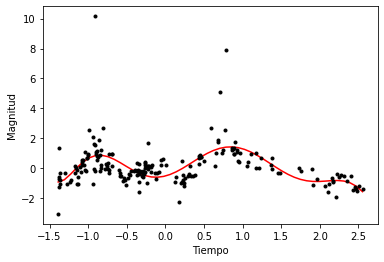

In [319]:
polinomio = PolynomialFeatures(degree = 8) 
modelo = Ridge(alpha=0.0000001,normalize=True) 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

modelo.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = modelo.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()


D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


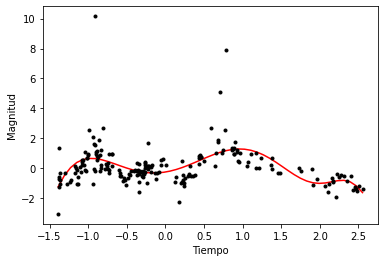

In [320]:
polinomio = PolynomialFeatures(degree = 16) 
modelo = Ridge(alpha=0.0001,normalize=True) 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

modelo.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = modelo.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


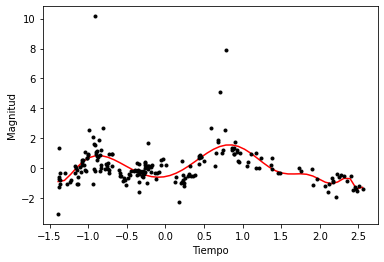

In [322]:
polinomio = PolynomialFeatures(degree = 24) 
modelo = Ridge(alpha=0.0000001,normalize=True) 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

modelo.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = modelo.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


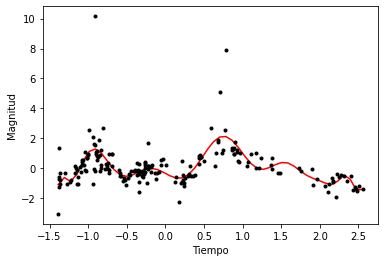

In [323]:
polinomio = PolynomialFeatures(degree = 36) 
modelo = Ridge(alpha=0.00000000001,normalize=True) 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

modelo.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = modelo.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
D:\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e+02, tolerance: 3.530e-02
  model = cd_fas

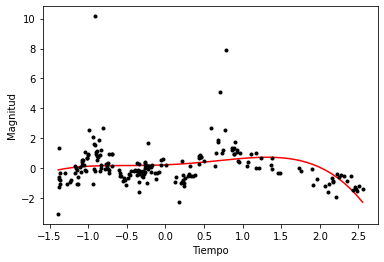

In [324]:
polinomio = PolynomialFeatures(degree = 4) 
modelo = Lasso(alpha=0.00000000000000001,normalize=True) 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

modelo.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = modelo.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
D:\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+02, tolerance: 3.530e-02
  model = cd_fas

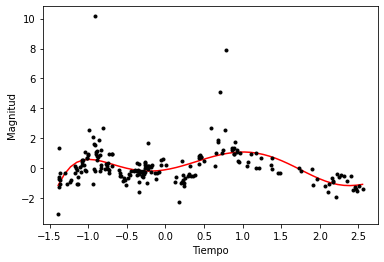

In [325]:
polinomio = PolynomialFeatures(degree = 8) 
modelo = Lasso(alpha=0.00000000000000001,normalize=True) 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

modelo.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = modelo.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
D:\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.270e+02, tolerance: 3.530e-02
  model = cd_fas

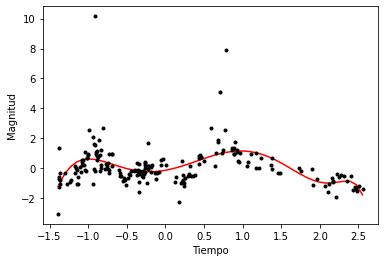

In [326]:
polinomio = PolynomialFeatures(degree = 16) 
modelo = Lasso(alpha=0.00000000000000001,normalize=True) 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

modelo.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = modelo.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


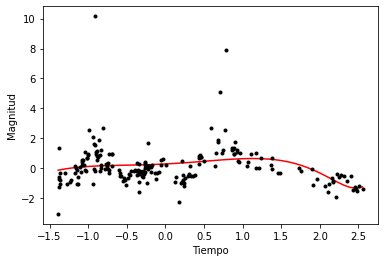

In [327]:
polinomio = PolynomialFeatures(degree = 24) 
modelo = Lasso(alpha=0.001,normalize=True) 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

modelo.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = modelo.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

D:\conda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
D:\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.266e+02, tolerance: 3.530e-02
  model = cd_fas

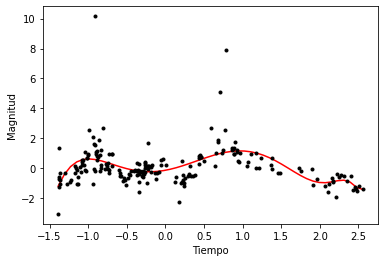

In [328]:
polinomio = PolynomialFeatures(degree = 36) 
modelo = Lasso(alpha=0.0000000001,normalize=True) 

x = muestra['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

modelo.fit(data_poly, muestra['magnitud']) 

x_lin = np.linspace(min(muestra['tiempo']),max(muestra['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = modelo.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(muestra['tiempo'], muestra['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

In [329]:
#Se evidencia que con valores de alpha mayores el modelo tiende a "seguir una linea recta" se hacen más simples y "suaves"
#a medida que alpha disminuye, el modelo comienza a tomar la forma de los datos, sin propiamente seguir valores demasiados alejados (outliers)


# Clasificación de estrellas

In [330]:
df = pd.read_csv("ts2.csv")
df

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,lpv,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,lpv,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,ecl,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,lpv,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,lpv,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,lpv,0.04000,0.112777,2,0.340000,0.0040,-0.000014,1.689189,13.335943,0.001613,0.0155,0.420000,0.004724,17.743225
4996,lpv,0.21250,0.000000,50,0.463333,-0.0655,-0.000224,11.590296,14.113617,0.009283,0.1250,0.303333,0.018120,1375.234215
4997,lpv,0.02175,0.030271,4,0.333333,0.0100,-0.000031,0.014262,14.477476,0.000819,0.0090,0.295238,0.002141,1111.578564
4998,lpv,0.02650,0.446972,2,0.313333,0.0030,0.000013,0.140885,13.661500,0.000972,0.0090,0.430000,0.003221,2866.316360


In [331]:
df.describe()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106905,0.130491,4.545400,0.317532,0.016345,0.000001,2.175457,14.988370,0.003703,0.039180,0.414658,0.010616,302.831851
std,0.147896,0.202838,6.121163,0.060427,0.126287,0.000684,9.423721,1.889971,0.005527,0.062624,0.122715,0.014490,944.665723
min,0.007000,0.000000,1.000000,0.070470,-1.763000,-0.016436,0.006402,11.666225,0.000259,0.002000,0.069444,0.000893,0.005627
25%,0.021000,0.000016,1.000000,0.290000,-0.004000,-0.000015,0.096856,13.608853,0.000743,0.007000,0.336667,0.002375,0.987460
50%,0.043500,0.020842,2.000000,0.318182,0.002500,-0.000002,0.342336,14.514339,0.001596,0.014000,0.411089,0.004850,18.144685
75%,0.143500,0.185764,5.000000,0.348214,0.017000,0.000009,1.038683,15.592764,0.005258,0.051500,0.480000,0.014186,189.760635
max,1.700500,0.980413,70.000000,0.536667,1.479000,0.033689,335.151515,21.099524,0.075959,1.025000,0.922034,0.171519,12870.875640


In [332]:
df.median(numeric_only = True)

Amplitude            0.043500
AndersonDarling      0.020842
Autocor_length       2.000000
Beyond1Std           0.318182
Gskew                0.002500
LinearTrend         -0.000002
MaxSlope             0.342336
Mean                14.514339
Meanvariance         0.001596
MedianAbsDev         0.014000
MedianBRP            0.411089
PercentAmplitude     0.004850
PeriodLS            18.144685
dtype: float64

In [333]:
df.cov()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
Amplitude,0.021873,-7.656020e-03,0.102322,0.000787,0.001169,1.438991e-06,0.323046,0.114288,7.885986e-04,0.008624,-0.002807,2.071538e-03,-9.906738
AndersonDarling,-0.007656,4.114344e-02,-0.222708,0.000158,-0.001927,-3.604871e-07,-0.171910,-0.068317,-2.668473e-04,-0.002857,-0.000665,-7.698128e-04,0.597061
Autocor_length,0.102322,-2.227081e-01,37.468633,0.054849,-0.013438,1.634551e-05,-3.343109,-2.821423,5.942695e-03,0.053050,-0.138680,1.104005e-02,797.721311
Beyond1Std,0.000787,1.581376e-04,0.054849,0.003651,-0.003295,-1.908614e-06,-0.031984,-0.016512,5.934227e-05,0.001142,-0.006023,-2.582216e-05,-0.707231
Gskew,0.001169,-1.926988e-03,-0.013438,-0.003295,0.015948,9.796217e-06,0.170894,0.051464,-1.265465e-05,-0.000600,0.005401,2.307651e-04,-3.582630
LinearTrend,0.000001,-3.604871e-07,0.000016,-0.000002,0.000010,4.680414e-07,0.000700,0.000056,-6.627387e-08,-0.000002,0.000004,1.952483e-07,-0.010113
MaxSlope,0.323046,-1.719101e-01,-3.343109,-0.031984,0.170894,7.003957e-04,88.806510,5.779555,8.031956e-03,0.098450,0.070713,2.992483e-02,-477.132677
Mean,0.114288,-6.831693e-02,-2.821423,-0.016512,0.051464,5.647148e-05,5.779555,3.571989,2.464035e-03,0.034980,0.037282,9.770767e-03,-234.540434
Meanvariance,0.000789,-2.668473e-04,0.005943,0.000059,-0.000013,-6.627387e-08,0.008032,0.002464,3.055287e-05,0.000334,-0.000164,7.498808e-05,-0.280502
MedianAbsDev,0.008624,-2.856669e-03,0.053050,0.001142,-0.000600,-1.710227e-06,0.098450,0.034980,3.343614e-04,0.003922,-0.002671,7.785662e-04,-3.812432


In [334]:
df.mode()

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,lpv,0.0145,0.0,1.0,0.333333,0.001,0.0,0.218341,13.147203,0.000573,0.005,0.403333,0.001801,10.169820
1,NaN,0.0160,NaN,NaN,NaN,NaN,NaN,NaN,14.497420,0.000645,NaN,0.420000,0.002054,10.237570
2,NaN,0.0165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.440000,0.002113,12.203784
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.285084
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.076512
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.819269
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,653.162259
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1394.064620
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1473.174480
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1668.116628


In [335]:
X1 = df.iloc[:,1:14]
y1 = df.iloc[:,0]

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)


# Arbol de decisión

In [337]:
clf = DecisionTreeClassifier(max_depth = 20, criterion='entropy') 
clf.fit(X_train, y_train)                                        
target_pred = clf.predict(X_test)

D:\conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Matriz de confusión')

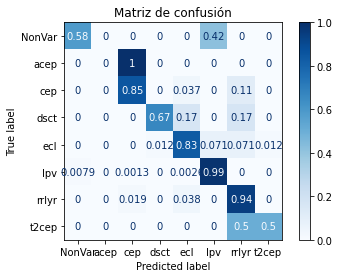

In [338]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Matriz de confusión')

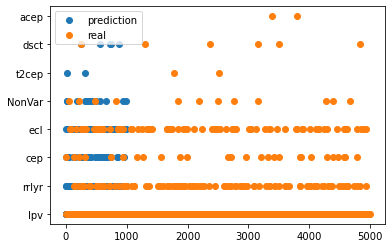

In [339]:
plt.plot(target_pred, 'o', label = 'prediction')
plt.plot(y_test, 'o', label = 'real')
plt.legend()
plt.show()

# Random forest

In [340]:
clf2 = RandomForestClassifier(n_estimators = 50, criterion='entropy', max_depth=70)
clf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=50)

In [341]:
target_pred = clf2.predict(X_test)

D:\conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Matriz de confusión')

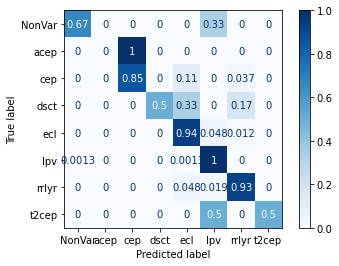

In [342]:
disp1 = plot_confusion_matrix(clf2, X_test, y_test,                                 
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Matriz de confusión')

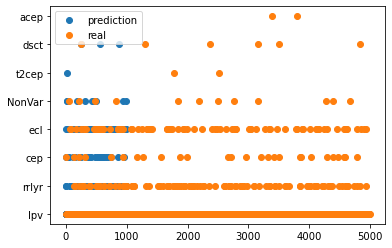

In [343]:
plt.plot(target_pred, 'o', label = 'prediction')
plt.plot(y_test, 'o', label = 'real')
plt.legend()
plt.show()

# KNN 

In [344]:
model1 = KNeighborsClassifier(n_neighbors = 9, metric = "minkowski")
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
acc = accuracy_score(y_test, y_pred1)
print(f"accuracy: {acc}")

accuracy: 0.923


D:\conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Matriz de confusión')

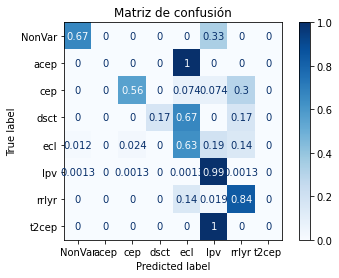

In [345]:
disp2 = plot_confusion_matrix(model1, X_test, y_test,                                 
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp2.ax_.set_title('Matriz de confusión')                    

In [346]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[  8   0   0   0   0   4   0   0]
 [  0   0   0   0   2   0   0   0]
 [  0   0  15   0   2   2   8   0]
 [  0   0   0   1   4   0   1   0]
 [  1   0   2   0  53  16  12   0]
 [  1   0   1   0   1 759   1   0]
 [  0   0   0   0  15   2  87   0]
 [  0   0   0   0   0   2   0   0]]
              precision    recall  f1-score   support

      NonVar       0.80      0.67      0.73        12
        acep       0.00      0.00      0.00         2
         cep       0.83      0.56      0.67        27
        dsct       1.00      0.17      0.29         6
         ecl       0.69      0.63      0.66        84
         lpv       0.97      0.99      0.98       763
       rrlyr       0.80      0.84      0.82       104
       t2cep       0.00      0.00      0.00         2

    accuracy                           0.92      1000
   macro avg       0.64      0.48      0.52      1000
weighted avg       0.92      0.92      0.92      1000



D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
